Chapter 4 Classification, q11

In [13]:
library(ISLR)
names(Auto)

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
[6] "acceleration" "year"         "origin"       "name"

# (a)

In [2]:
mpg_median = median(Auto$mpg)
mpg01 = rep(0,length(Auto$mpg))
mpg01[Auto$mpg>mpg_median]=1
new_auto = data.frame(Auto,mpg01)
names(new_auto)

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
 [6] "acceleration" "year"         "origin"       "name"         "mpg01"

# (b)

In [3]:
cor(new_auto[,-9])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088,0.8369392
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316,-0.7591939
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351,-0.7534766
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715,-0.6670526
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054,-0.7577566
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458,0.3468215
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277,0.4299042
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000,0.5136984
mpg01,0.8369392,-0.7591939,-0.7534766,-0.6670526,-0.7577566,0.3468215,0.4299042,0.5136984,1.0000000


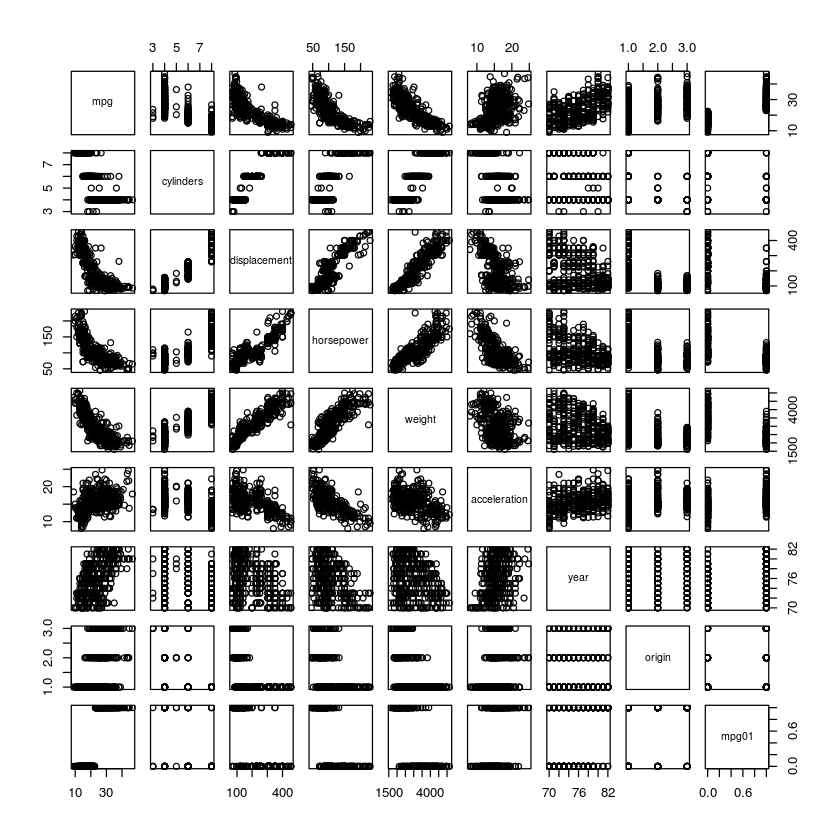

In [91]:
pairs(new_auto[,-9])

mpg01 has negative correlation with cylinders, displacement, horsepower and weight, and positive correlation with mpg and origin.

# (c)

In [5]:
nrow(new_auto)

[1] 392

In [77]:
new_auto = new_auto[sample(nrow(new_auto)),] #shuffle the data
training_data = new_auto[1:292,]
test_data = new_auto[293:nrow(new_auto),]
#removing the names column
training_data = training_data[,-9]
test_data = test_data[,-9]

# (d)

In [78]:
library(MASS)
lda.model = lda(mpg01~cylinders+displacement+horsepower+weight+origin,data=training_data)
lda.model

Call:
lda(mpg01 ~ cylinders + displacement + horsepower + weight + 
    origin, data = training_data)

Prior probabilities of groups:
        0         1 
0.5034247 0.4965753 

Group means:
  cylinders displacement horsepower   weight   origin
0  6.789116     275.5034  131.70068 3652.415 1.156463
1  4.179310     113.4103   77.50345 2309.531 2.020690

Coefficients of linear discriminants:
                      LD1
cylinders    -0.373009105
displacement -0.000299391
horsepower    0.002212115
weight       -0.001110010
origin        0.232472829

In [79]:
lda.pred = predict(lda.model,newdata=test_data)
#test error percentage
mean(lda.pred$class!=test_data$mpg01)*100

[1] 13

# (e)

In [80]:
qda.model = qda(mpg01~cylinders+displacement+horsepower+weight+origin,data=training_data)
qda.model

Call:
qda(mpg01 ~ cylinders + displacement + horsepower + weight + 
    origin, data = training_data)

Prior probabilities of groups:
        0         1 
0.5034247 0.4965753 

Group means:
  cylinders displacement horsepower   weight   origin
0  6.789116     275.5034  131.70068 3652.415 1.156463
1  4.179310     113.4103   77.50345 2309.531 2.020690

In [81]:
qda.pred = predict(qda.model,newdata=test_data)
#test error percentage
mean(qda.pred$class!=test_data$mpg01)*100

[1] 11

# (f)

In [82]:
lgs.model = glm(mpg01~cylinders+displacement+horsepower+weight+origin,data=training_data,family=binomial)
summary(lgs.model)


Call:
glm(formula = mpg01 ~ cylinders + displacement + horsepower + 
    weight + origin, family = binomial, data = training_data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.51405  -0.16834  -0.00112   0.28082   2.88530  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  12.301162   2.134326   5.763 8.24e-09 ***
cylinders     0.253325   0.426015   0.595  0.55209    
displacement -0.010587   0.011150  -0.950  0.34235    
horsepower   -0.055791   0.017964  -3.106  0.00190 ** 
weight       -0.002492   0.000847  -2.942  0.00326 ** 
origin        0.370039   0.363785   1.017  0.30906    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 404.78  on 291  degrees of freedom
Residual deviance: 140.01  on 286  degrees of freedom
AIC: 152.01

Number of Fisher Scoring iterations: 7


In [83]:
lgs.probs = predict(lgs.model,newdata=test_data,type="response")
lgs.pred = rep(0,nrow(test_data))
lgs.pred[lgs.probs>0.5]=1
#test error percentage
mean(lgs.pred!=test_data$mpg01)*100

[1] 12

# (g)

In [84]:
library(class)
train.y = training_data$mpg01
test.y = test_data$mpg01
knn.pred = knn(training_data,test_data,train.y,k=1)
#test error rate wtih k =1
mean(knn.pred!=test.y)*100

[1] 12

In [85]:
knn.pred = knn(training_data,test_data,train.y,k=3)
#test error rate wtih k =3
mean(knn.pred!=test.y)*100

[1] 12

In [89]:
knn.pred = knn(training_data,test_data,train.y,k=5)
#test error rate wtih k =5
mean(knn.pred!=test.y)*100

[1] 11

In [90]:
knn.pred = knn(training_data,test_data,train.y,k=10)
#test error rate wtih k =10
mean(knn.pred!=test.y)*100

[1] 14

k=5 gives the lowest error rate